In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
import pickle

from L1_regularization.L1RegularizationNet import L1RegularizationNet

In [2]:
with open('data/duffing/duffing_train.pickle', 'rb') as f:
    train_data = pickle.load(f)

with open('data/duffing/duffing_test.pickle', 'rb') as f:
    test_data = pickle.load(f)

In [3]:
t_train = torch.linspace(0, train_data.DT * len(train_data.x), len(train_data.y))
t_test = torch.linspace(0, test_data.DT * len(test_data.x), len(test_data.y))

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, shuffle=True)

In [4]:
model = L1RegularizationNet([3, 64, 64, 64, 2])

In [5]:
model.train_n_epochs(train_loader, 1000, lr=0.001, l1=0.001, verbose=True)

Epoch 0: 0.5524946451187134
Epoch 100: 0.039760034531354904
Epoch 200: 0.02908536233007908
Epoch 300: 0.023845870047807693
Epoch 400: 0.022892707958817482
Epoch 500: 0.022371385246515274
Epoch 600: 0.02209184505045414
Epoch 700: 0.021763266995549202
Epoch 800: 0.021668458357453346
Epoch 900: 0.02131693810224533


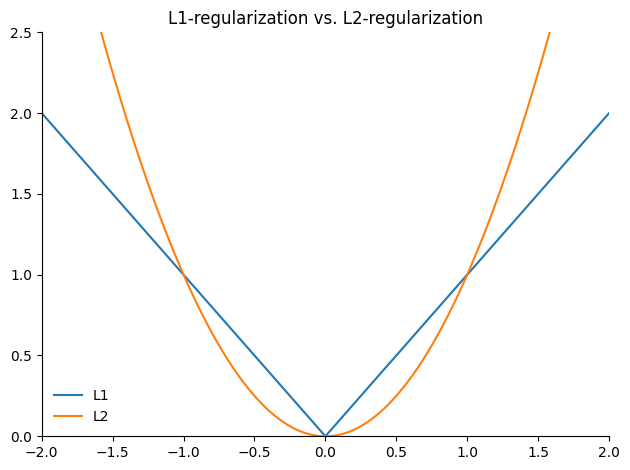

In [6]:
x = torch.linspace(-3, 3, 1000)
l1 = abs(x)
l2 = x ** 2
ax = plt.subplot(111)
ax.plot(x, l1)
ax.plot(x, l2)
plt.ylim(0, 2.5)
plt.xlim(-2, 2)
ax.legend(["L1", "L2"], frameon=False)
plt.title("L1-regularization vs. L2-regularization")
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.tight_layout()
plt.savefig("L1_vs_L2.pdf", transparent=True)